<a href="https://colab.research.google.com/github/dilkhushiitr/Drug-recommendation-model/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_train  = pd.read_csv("/content/drive/MyDrive/AI Lab /Loan prediction/train_ctrUa4K.csv")
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [5]:
df_test = pd.read_csv("/content/drive/MyDrive/AI Lab /Loan prediction/test_lAUu6dG.csv")
df_test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [6]:
df_train.shape, df_test.shape

((614, 13), (367, 12))

# EDA

## 1. Univariate analysis


### Target Variable (Categorical)
for categorical variable = Frequency table,




for Numerical variable  = histogram table

Y    422
N    192
Name: Loan_Status, dtype: int64


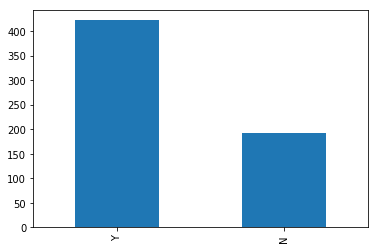

In [ ]:
print(df_train['Loan_Status'].value_counts())
df_train['Loan_Status'].value_counts().plot.bar()

### Independent Variable (Categorical)¶


In [ ]:
print("Gender is : \n", df_train['Gender'].value_counts(normalize=True))
print(" ")
print("married status is : \n",df_train['Married'].value_counts(normalize=True))
print(" ")
print("Employee status ", df_train['Self_Employed'].value_counts(normalize=True))
print(" ")
print("Credit history is : \n", df_train['Credit_History'].value_counts(normalize=True))

print(" ")
print("Education status is :\n ", df_train['Education'].value_counts(normalize=True))


Gender is : 
 Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
 
married status is : 
 Yes    0.651391
No     0.348609
Name: Married, dtype: float64
 
Employee status  No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
 
Credit history is : 
 1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64
 
Education status is :
  Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64


###  Independent Variable (Numerical)
use to check that data is normalized or not as


C:\Users\Dilkhush.Meena\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


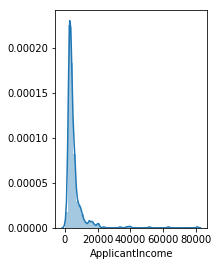

In [ ]:
plt.subplot(121)
sns.distplot(df_train["ApplicantIncome"])

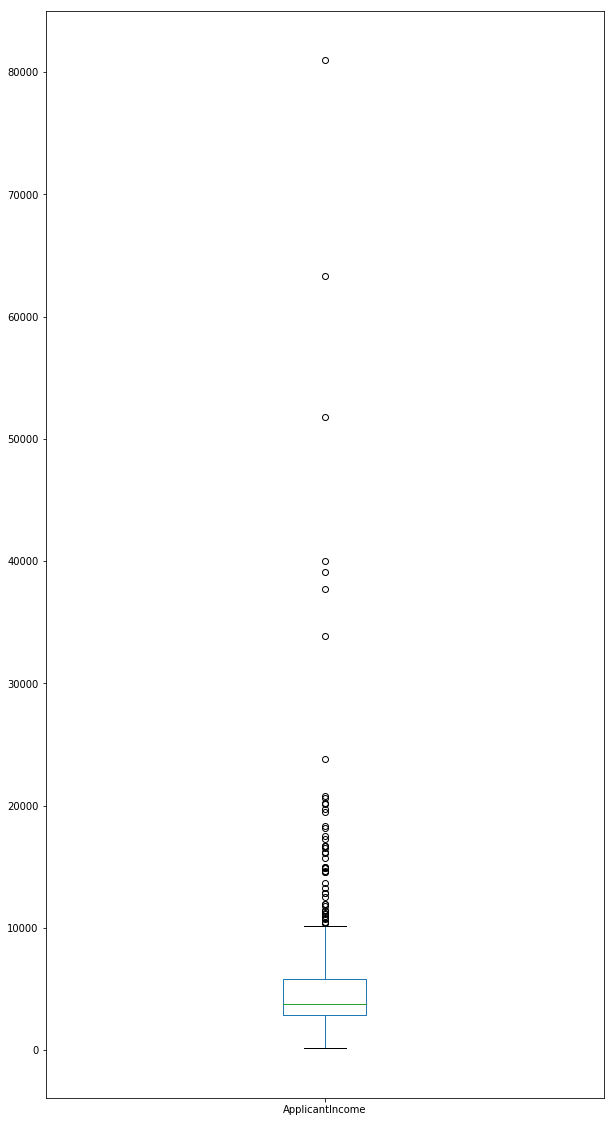

In [ ]:
df_train["ApplicantIncome"].plot.box(figsize = (10,20))

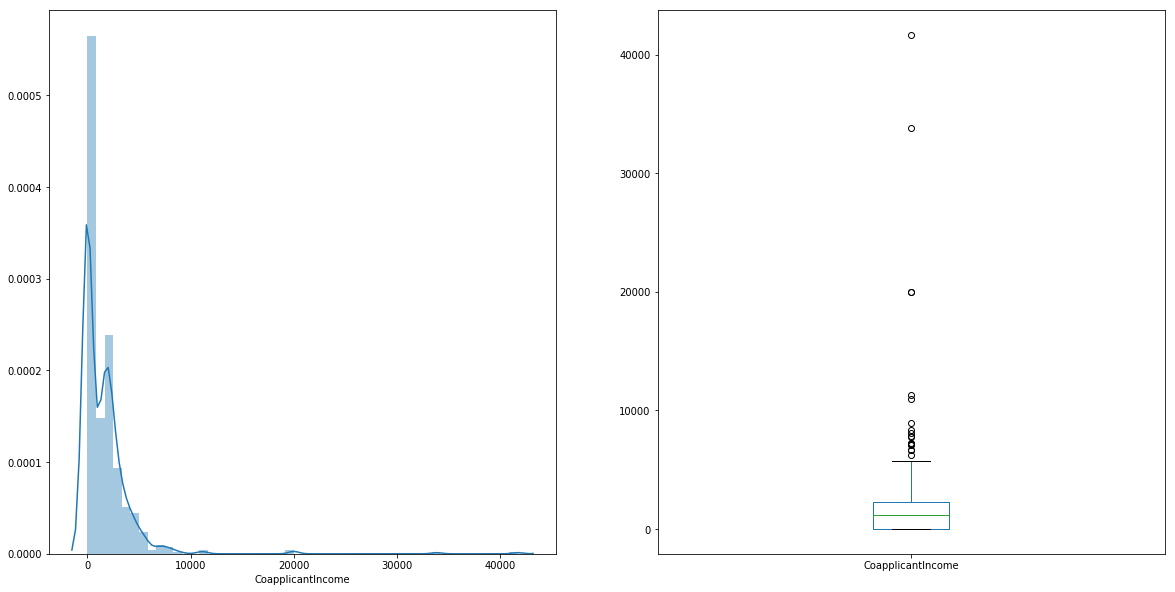

In [ ]:
plt.subplot(121)
sns.distplot(df_train["CoapplicantIncome"])
plt.subplot(122)
df_train["CoapplicantIncome"].plot.box(figsize = (20,10))

C:\Users\Dilkhush.Meena\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


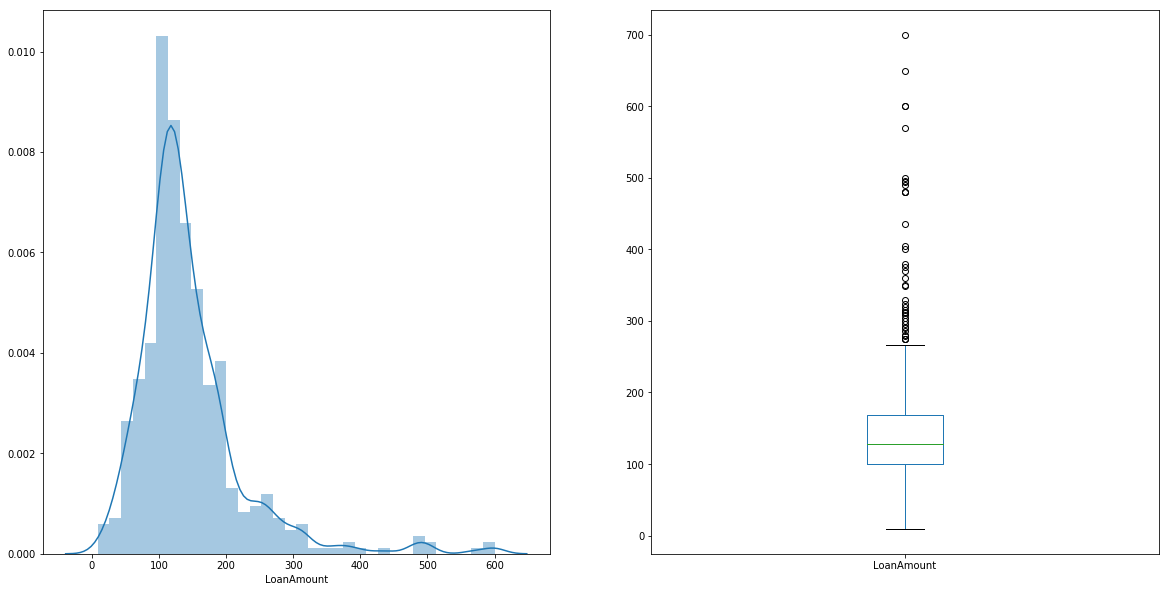

In [ ]:
plt.subplot(121)
df = df_train.dropna()
sns.distplot(df["LoanAmount"])
plt.subplot(122)
df_train["LoanAmount"].plot.box(figsize = (20,10))
plt.show()

In [ ]:
df_train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

## 2.Bivariate Analysis

In [ ]:
print(pd.crosstab(df_train["Gender"], df_train["Loan_Status"]))

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


## 3. check that which variable effect the target variable

#### 3.1 make bins for ApplicantIncome variable


In [ ]:
df_train["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [ ]:
df_train['Income_bin'] = df_train['ApplicantIncome'].apply(lambda x: "low"if (x<=2900)
                                                           else ("average" if (x>2900) & (x<=3800)
                                                                 else ("high" if (x>3800) & (x<=5800)
                                                                       else ("very high"))))

df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,very high
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,very high


Loan_Status   N    Y
Income_bin          
average      47  100
high         47  108
low          49  110
very high    49  104


Text(0, 0.5, '%')

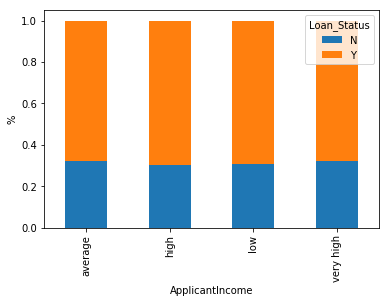

In [ ]:
print(pd.crosstab(df_train["Income_bin"], df_train["Loan_Status"]))
Income_bin = pd.crosstab(df_train["Income_bin"], df_train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel("ApplicantIncome")
plt.ylabel("%")

#### 3.2 make bins for CoapplicantIncome variable


In [ ]:
df_train["CoapplicantIncome"].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [ ]:
df_train['CoapplicantIncome_bin'] = df_train['CoapplicantIncome'].apply(lambda x: "low"if (x<=1000)
                                                           else ("average" if (x>1000) & (x<=3000)
                                                                       else ("high")))

Loan_Status             N    Y
CoapplicantIncome_bin         
average                61  161
high                   32   65
low                    99  196


Text(0, 0.5, '%')

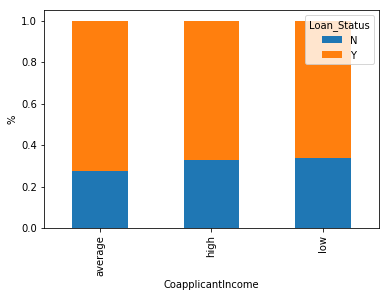

In [ ]:
print(pd.crosstab(df_train["CoapplicantIncome_bin"], df_train["Loan_Status"]))
Income_bin = pd.crosstab(df_train["CoapplicantIncome_bin"], df_train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel("CoapplicantIncome")
plt.ylabel("%")

In [ ]:
## So we can make a new variable in which we will combine the applicant’s and
## coapplicant’s income to visualize the combined effect of income on loan approval

In [ ]:
df_train["total_income"] = df_train["ApplicantIncome"] + df_train["CoapplicantIncome"]

In [ ]:
df_train["total_income"].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: total_income, dtype: float64

In [ ]:
df_train['total_income_bin'] = df_train['total_income'].apply(lambda x: "low"if (x<=2500)
                                                           else ("average" if (x>2500) & (x<=4000)
                                                                 else ("high" if (x>4000) & (x<=6000)
                                                                       else ("very high"))))


In [ ]:
df_train["total_income_bin"].value_counts(normalize=True)

very high    0.402280
high         0.364821
average      0.193811
low          0.039088
Name: total_income_bin, dtype: float64

Loan_Status        N    Y
total_income_bin         
average           32   87
high              65  159
low               14   10
very high         81  166


Text(0, 0.5, '%')

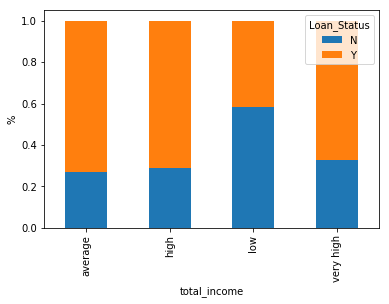

In [ ]:
print(pd.crosstab(df_train["total_income_bin"], df_train["Loan_Status"]))
Income_bin = pd.crosstab(df_train["total_income_bin"], df_train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel("total_income")
plt.ylabel("%")

In [ ]:
# drop the new variable of bins
df_train = df_train.drop(['Income_bin', 'CoapplicantIncome_bin', 'total_income_bin', 'total_income'], axis=1)
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_train["Dependents"].replace('3+', 3, inplace= True)
df_test["Dependents"].replace('3+', 3, inplace =True)

In [ ]:
df_train["Loan_Status"].replace('Y', 1, inplace = True)
df_train["Loan_Status"].replace('N', 0, inplace = True)

In [ ]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


#### 3.3 correlation matrix

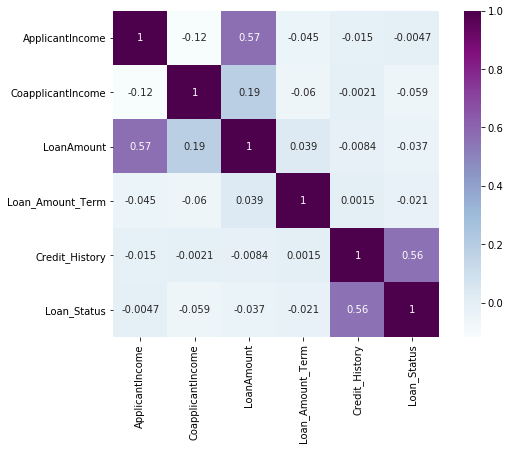

In [ ]:
# calculate and visualize correlation matrix
matrix = df_train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

# data pre processing

In [ ]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## 1. missing values

In [ ]:
# for train data
df_train["Gender"].fillna(df_train['Gender'].mode()[0] ,inplace  = True )
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace  = True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace  = True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace  = True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace  = True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0] ,inplace  =True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)


In [ ]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
df_train.isnull().sum()
# to check about the outliers

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# for test data
df_test["Gender"].fillna(df_test['Gender'].mode()[0] ,inplace  = True )
df_test['Married'].fillna(df_test['Married'].mode()[0], inplace  = True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace  = True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace  = True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace  = True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0] ,inplace  =True)
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(), inplace=True)


In [ ]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## 2. Outlier Treatment

Text(0.5, 1.0, 'test')

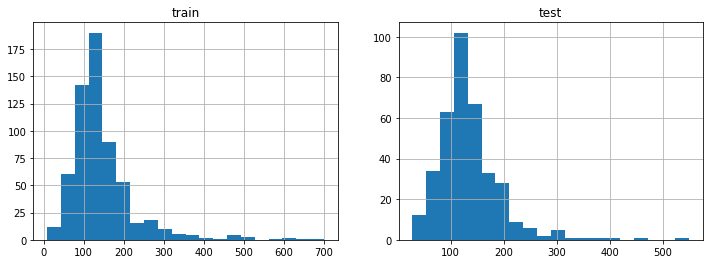

In [ ]:
#before transformation
ax1 = plt.subplot(121)
df_train["LoanAmount"].hist(bins = 20, figsize = (12,4))
ax1.set_title("train")

ax1 = plt.subplot(122)
df_test["LoanAmount"].hist(bins = 20, figsize = (12,4))
ax1.set_title("test")

In [ ]:
df_train["LoanAmount_log"] = np.log(df_train["LoanAmount"])
df_test["LoanAmount_log"] = np.log(df_test["LoanAmount"])

Text(0.5, 1.0, 'test')

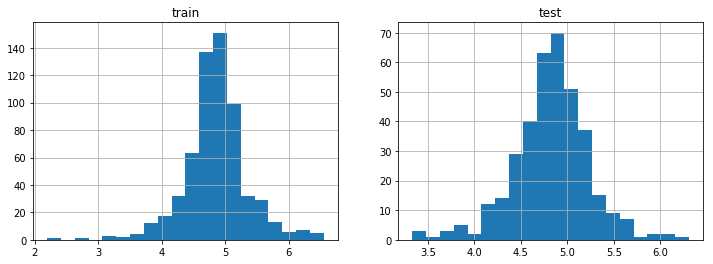

In [ ]:
# after log transformation
ax1 = plt.subplot(121)
df_train["LoanAmount_log"].hist(bins = 20, figsize = (12,4))
ax1.set_title("train")

ax1 = plt.subplot(122)
df_test["LoanAmount_log"].hist(bins = 20, figsize = (12,4))
ax1.set_title("test")

# Model Development and Evaluation

In [ ]:
df_train = df_train.drop('Loan_ID', axis=1)
df_test = df_test.drop('Loan_ID', axis=1)

In [ ]:
df_train.shape, df_test.shape

((614, 13), (367, 12))

In [ ]:
# drop "Loan_Status" and assign it to target variable
x = df_train.drop('Loan_Status', 1)      # x  =training data
y = df_train.Loan_Status   # y = test data

In [ ]:
x.shape,y.shape

((614, 12), (614,))

In [ ]:
# dummy variable
x = pd.get_dummies(x)
train = pd.get_dummies(df_train)
test = pd.get_dummies(df_test)

In [ ]:
x.shape   , train.shape   ,test.shape

((614, 21), (614, 22), (367, 21))

In [ ]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,1,0,0,0,1,1,0,0,0,1


## 1. Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape


((429, 21), (185, 21), (429,), (185,))

In [ ]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# fit the model
# Prefer dual=False when n_samples > n_features
model = LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=1.0,fit_intercept=True, intercept_scaling=1,
                           class_weight=None,random_state=None,solver='liblinear',max_iter=100 ,verbose=0,
                           warm_start=False,n_jobs=None)
model.fit(x_train, y_train)

C:\Users\Dilkhush.Meena\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = None.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
################### make prediction on cv data
pred_cv = model.predict(x_cv)
print("Accuracy for cross validation is :", round(accuracy_score(y_cv, pred_cv)*100, 3) ,"%")

Accuracy for cross validation is : 83.243 %


In [ ]:
print("size of pred_cv is :", pred_cv.size)
print("The values in pred_cv are :", pred_cv)

size of pred_cv is : 185
The values in pred_cv are : [1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_cv ,pred_cv)
print(cm)

[[ 22  29]
 [  2 132]]


In [ ]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

             precision    recall  f1-score   support

          0       0.92      0.43      0.59        51
          1       0.82      0.99      0.89       134

avg / total       0.85      0.83      0.81       185



In [ ]:
################## make prediction on test data
pred_test = model.predict(test)

In [ ]:
pred_test[:50]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

### Logistic Regression using stratified k-folds cross validation¶


In [ ]:
# import StratifiedKFold from sklearn and fit the model
from sklearn.model_selection import StratifiedKFold

In [ ]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(x, y):
    print("\n {} of kfold {}" . format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1

print("\nMean validation accuracy: ", round(sum(mean_accuracy)/len(mean_accuracy), 4)*100)



 1 of kfold 5
accuracy_score 0.7983870967741935

 2 of kfold 5
accuracy_score 0.8306451612903226

 3 of kfold 5
accuracy_score 0.8114754098360656

 4 of kfold 5
accuracy_score 0.7950819672131147

 5 of kfold 5
accuracy_score 0.8278688524590164

Mean validation accuracy:  81.27


In [ ]:
# make prediction on test set
pred_test = model.predict(test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]

In [ ]:
print("size of pred_cv is :", pred_test.size)
print("The values in pred_cv are :", pred_test)

size of pred_cv is : 367
The values in pred_cv are : [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


# 2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(x, y):
    print("\n {} of kfold {}" . format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model  = RandomForestClassifier(random_state = 1, max_depth = 10, n_estimators = 400)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1

print("\nMean validation accuracy: ", round(sum(mean_accuracy)/len(mean_accuracy), 4)*100)


 1 of kfold 5
accuracy_score 0.7903225806451613

 2 of kfold 5
accuracy_score 0.8064516129032258

 3 of kfold 5
accuracy_score 0.7540983606557377

 4 of kfold 5
accuracy_score 0.7868852459016393

 5 of kfold 5
accuracy_score 0.819672131147541

Mean validation accuracy:  79.14999999999999


### grid search for random forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)),
             'n_estimators': list(range(1, 200, 20))}

# default 3-fold cross validation, cv=3
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size =0.3, random_state=1)

In [ ]:
# fit the grid search model
grid_search.fit(x_train, y_train)

C:\Users\Dilkhush.Meena\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
grid_search.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [ ]:
mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(x, y):
    print("\n {} of kfold {}" . format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model  = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=121)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1

print("\nMean validation accuracy: ", round(sum(mean_accuracy)/len(mean_accuracy), 4)*100)


 1 of kfold 5
accuracy_score 0.7983870967741935

 2 of kfold 5
accuracy_score 0.8306451612903226

 3 of kfold 5
accuracy_score 0.8114754098360656

 4 of kfold 5
accuracy_score 0.7868852459016393

 5 of kfold 5
accuracy_score 0.8278688524590164

Mean validation accuracy:  81.11


### Feature Importance

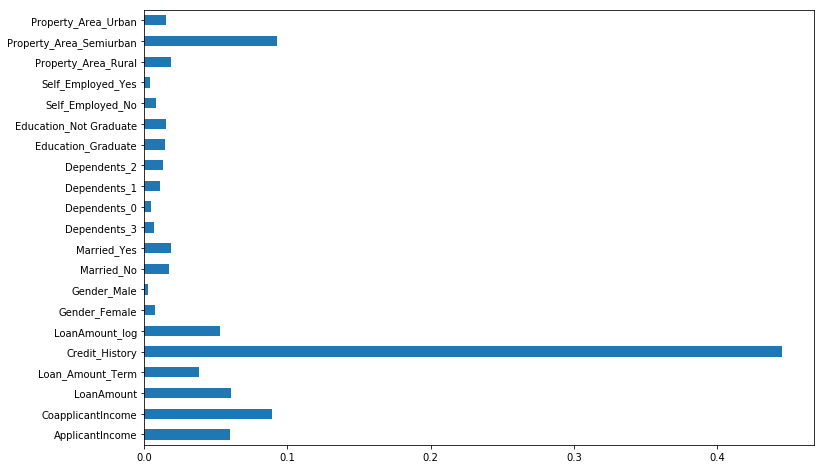

In [ ]:
# extract feature importances, convert into a Series
importances = pd.Series(model.feature_importances_, index=x.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))

# 3. xgboost

In [ ]:
from xgboost import XGBClassifier
mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(x, y):
    print("\n {} of kfold {}" . format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = XGBClassifier(random_state=1, n_estimators=100, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1

print("\nMean validation accuracy: ", round(sum(mean_accuracy)/len(mean_accuracy), 4)*100)


 1 of kfold 5
accuracy_score 0.7580645161290323

 2 of kfold 5
accuracy_score 0.7741935483870968

 3 of kfold 5
accuracy_score 0.7295081967213115

 4 of kfold 5
accuracy_score 0.7459016393442623

 5 of kfold 5
accuracy_score 0.7950819672131147

Mean validation accuracy:  76.05


In [ ]:
from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)),
             'n_estimators': list(range(1, 200, 20))}

# default 3-fold cross validation, cv=3
grid_search = GridSearchCV(XGBClassifier(random_state=1), paramgrid)

# split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size =0.3, random_state=1)

grid_search.fit(x_train, y_train)

C:\Users\Dilkhush.Meena\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Dilkhush.Meena\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=1, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
grid_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=1, min_child_weight=1, missing=None,
       n_estimators=161, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=1, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [ ]:
from xgboost import XGBClassifier
mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

for train_index, test_index in kf.split(x, y):
    print("\n {} of kfold {}" . format(i, kf.n_splits))
    xtr, xvl = x.loc[train_index], x.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=1, min_child_weight=1, missing=None,
       n_estimators=161, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=1, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1

print("\nMean validation accuracy: ", round(sum(mean_accuracy)/len(mean_accuracy), 4)*100)


 1 of kfold 5
accuracy_score 0.7983870967741935

 2 of kfold 5
accuracy_score 0.8306451612903226

 3 of kfold 5
accuracy_score 0.8032786885245902

 4 of kfold 5
accuracy_score 0.7868852459016393

 5 of kfold 5
accuracy_score 0.8278688524590164

Mean validation accuracy:  80.94
